In [1]:
import numpy as np
import matplotlib.pyplot as plt

# for null spaces
import scipy.linalg

# a pretty-looking matrix from scipy
from scipy.linalg import toeplitz

In [2]:
from IPython import display
display.set_matplotlib_formats('svg') # print figures in svg format
plt.rcParams.update({'font.size':14}) # set global font size

/tmp/ipykernel_21691/3523346633.py:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg') # print figures in svg format


# Column space

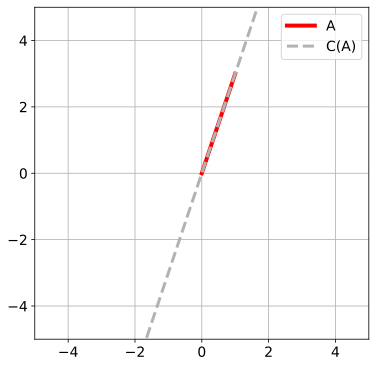

In [12]:
A  = np.array([ [1],[3] ])

# The column space contains an infinite number of points, but for computational convenience,
# we can draw the line using only two points
xlim = [-5,5]
colspace_p1 = xlim[0]*A
colspace_p2 = xlim[1]*A

plt.figure(figsize=(6,6))

plt.plot([0,A[0,0]],[0,A[1,0]],'r',linewidth=4,label='A')
plt.plot([colspace_p1[0,0],colspace_p2[0,0]],[colspace_p1[1,0],colspace_p2[1,0]],
         '--',linewidth=3,color=[.7,.7,.7],label='C(A)')

plt.xlim(xlim)
plt.ylim(xlim)
plt.legend()
plt.grid()
plt.savefig('Figure_06_01.png',dpi=300)
plt.show()

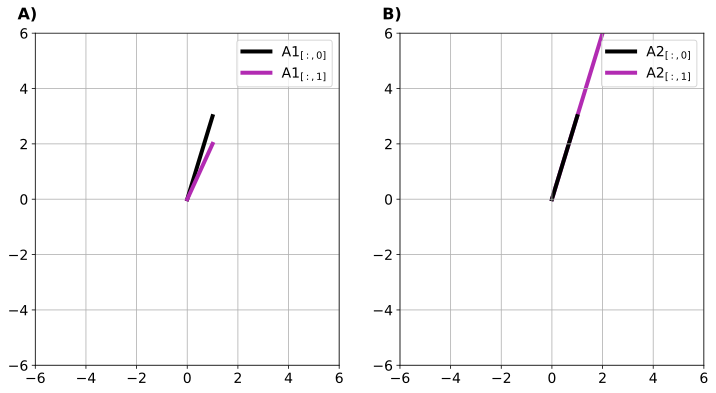

In [13]:
A1  = np.array([ [1,1],[3,2] ])
A2  = np.array([ [1,2],[3,6] ])



# some other plotting specifications
xlim = [-6,6]
color = [ [0,0,0],[.7,.17,.7] ]


# make the plot
_,axs = plt.subplots(1,2,figsize=(12,6))

# loop over columns
for i in range(2):
    axs[0].plot([0,A1[0,i]],[0,A1[1,i]],color=color[i],linewidth=4)
    axs[1].plot([0,A2[0,i]],[0,A2[1,i]],color=color[i],linewidth=4,zorder=-i)

    # set some axis properties
    axs[i].set_xlim(xlim)
    axs[i].set_ylim(xlim)
    axs[i].grid()
    axs[i].text(xlim[0]-.7,xlim[1]+.5,f'{"AB"[i]})',fontweight='bold',fontsize=16)

# set the legends and subplot letters
for i in [0,1]: axs[i].legend([f'A{i+1}$_{{[:,0]}}$',f'A{i+1}$_{{[:,1]}}$'])

plt.savefig('Figure_06_02.png',dpi=300)
plt.show()

# R3

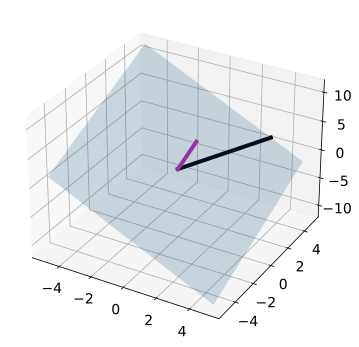

In [14]:
A = np.array( [ [3,0],
                [5,2],
                [1,2] ] )


# create a 3D graph
ax = plt.figure(figsize=(6,6)).add_subplot(111, projection='3d')

# draw plane corresponding to the column space
xx, yy = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))
cp = np.cross(A[:,0],A[:,1])
z1 = (-cp[0]*xx - cp[1]*yy)/cp[2]
ax.plot_surface(xx,yy,z1,alpha=.2)


## plot the two vectors from matrix S
ax.plot([0, A[0,0]],[0, A[1,0]],[0, A[2,0]],color=color[0],linewidth=4)
ax.plot([0, A[0,1]],[0, A[1,1]],[0, A[2,1]],color=color[1],linewidth=4)

plt.savefig('Figure_06_03.png',dpi=300)
plt.show()

# Null Spaces

In [15]:
A = np.array([ [1,-1],[-2,2] ])
B = np.array([ [1,-1],[-2,3] ])

# null spaces
print( scipy.linalg.null_space(A) )
print(' ')

print( scipy.linalg.null_space(B) )

[[0.70710678]
 [0.70710678]]
 
[]


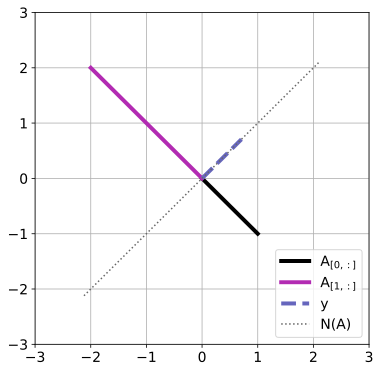

In [20]:

nullvect = scipy.linalg.null_space(A)



# some other plotting specifications
xlim = [-3,3]
color = [ [0,0,0],[.7,.17,.7] ]


# make the plot
plt.figure(figsize=(6,6))

# plot the rows
for i in range(2):
    plt.plot([0,A[i,0]],[0,A[i,1]],color=color[i],linewidth=4,label='A$_{{[%g,:]}}$'%i)

# plot the nullspace vector
plt.plot([0,nullvect[0,0]],[0,nullvect[1,0]],'--',color=[.4,.4,.74],
         linewidth=4,label='y')

# plot the rest of the nullspace
plt.plot([xlim[0]*nullvect[0,0],xlim[1]*nullvect[0,0]],
         [xlim[0]*nullvect[1,0],xlim[1]*nullvect[1,0]],
         ':',color=[.4,.4,.4],label='N(A)')

# set some axis properties
plt.xlim(xlim)
plt.ylim(xlim)
plt.grid()
plt.legend()

plt.savefig('Figure_06_04.png',dpi=300)
plt.show()

# Exercises

## Exercise 6-1

The norm of a matrix is related to the scale of the numerical values in the matrix. In
this exercise, you will create an experiment to demonstrate this. In each of 10 experi‐
ment iterations, create a 10 × 10 random numbers matrix and compute its Frobenius
norm. Then repeat this experiment 40 times, each time scalar multiplying the matrix
by a different scalar that ranges between 0 and 50. The result of the experiment
will be a 40 × 10 matrix of norms. Figure 6-7 shows the resulting norms, averaged
over the 10 experiment iterations. This experiment also illustrates two additional
properties of matrix norms: they are strictly nonnegative and can equal 0 only for the
zeros matrix.

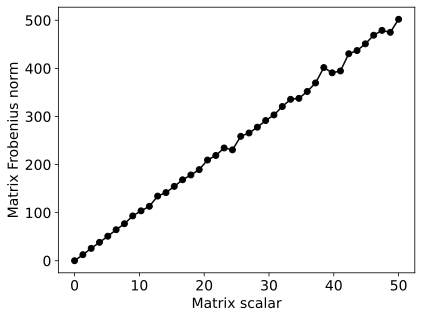

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [21]:
# experiment simulations
scalingVals = np.linspace(0,50,40) # range of scaling parameters (0 to 50 in 40 steps)
nExperiments = 10


# initialize output
matrixNorms = np.zeros((len(scalingVals),nExperiments))

# run experiment!
for si in range(len(scalingVals)):
    for expi in range(nExperiments):

        # generate a random scaled matrix
        R = np.random.randn(10,10) * scalingVals[si]

        # store its norm
        matrixNorms[si,expi] = np.linalg.norm(R,'fro')


# plot the results!
plt.plot(scalingVals,np.mean(matrixNorms,axis=1),'ko-')
plt.xlabel('Matrix scalar')
plt.ylabel('Matrix Frobenius norm')
plt.savefig('Figure_06_07.png',dpi=300)
plt.show()

# check that norm=0 for zeros matrix
print(matrixNorms[0,:])

## Exercise 6-2

In this exercise, you will write an algorithm that finds a scalar that brings the
Frobenius distance between two matrices to 1. Start by writing a Python function
that takes two matrices (of the same size) as input and returns the Frobenius distance
between them. Then create two N × N random numbers matrices (I used N = 7 in
the solutions code, but you can use any other size).

Create a variable s = 1 that scalar multiplies both matrices. Compute the Frobenius distance between the scaled
matrices. As long as that distance remains above 1, set the scalar to be .9 times itself
and recompute the distance between the scaled matrices. This should be done in
a while loop. When the Frobenius distance gets below 1, quit the while loop and
report the number of iterations (which corresponds to the number of times that the
scalar s was multiplied by .9) and the scalar value.

In [22]:
# Function to compute Euclidean distance

def EuclideanDistance(M1,M2):
     # matrix difference
    D = M1-M2

    # matrix distance
    return np.sqrt(np.sum(D**2))

In [23]:
# optimization code

# create two matrices
N = 7
A = np.random.randn(N,N)
B = np.random.randn(N,N)

# optimization
numIters = 0
s = 1
while EuclideanDistance(s*A,s*B)>1:
    s *= .9
    numIters += 1

# report the results. Note that my loop code scales once more after criteria is reached,
# so I subtract one from numIters and undo the final s scaling.
print(f'Number of iterations: {numIters-1}')
print(f'Final value of scalar: {s/.9:.3f}')
print(f'Final Euclidean distance: {EuclideanDistance(s/.9*A,s/.9*B):.3f}')

Number of iterations: 21
Final value of scalar: 0.109
Final Euclidean distance: 1.051


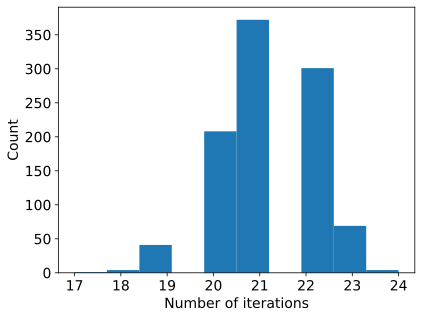

In [27]:
# The code below isn't part of the exercise, but I was curious to repeat the optimization
# 1000 times to see the distribution of numIters

nIters = np.zeros(1000)

for i in range(1000):
  # create two matrices
    A = np.random.randn(N,N)
    B = np.random.randn(N,N)

    numIters,s = 0,1
    while EuclideanDistance(s*A,s*B)>1:
        s *= .9
        numIters += 1
    nIters[i] = numIters-1

plt.hist(nIters)
plt.xlabel('Number of iterations')
plt.ylabel('Count');

## Exercise 6-3

Demonstrate that the trace method and the Euclidean formula produce the same
result (the Frobenius norm). Does the trace formula work only for ATA, or do you
get the same result for AAT?

In [28]:
# Create a matrix
M = 50
A = np.random.randn(M,M)

# trace method
norm1 = np.sqrt(np.sum(np.diag(A.T@A)))

# Euclidean norm method
norm2 = np.sqrt(np.sum(A**2))

# if they're equal, their difference should be (very close to) zero
norm1-norm2

0.0

## Exercise 6-4

This will be a fun exercise,7 because you’ll get to incorporate material from this and
the previous chapters. You will explore the impact of shifting a matrix on the norm
of that matrix. Start by creating a 10 × 10 random matrix and compute its Frobenius
norm. Then code the following steps inside a for loop: (1) shift the matrix by a
fraction of the norm, (2) compute the percent change in norm from the original,
(3) compute the Frobenius distance between the shifted and original matrices, and
(4) compute the correlation coefficient between the elements in the matrices (hint:
correlate the vectorized matrices using np.flatten()). The fraction of the norm that
you shift by should range from 0 to 1 in 30 linearly spaced steps. Make sure that at
each iteration of the loop, you use the original matrix, not the shifted matrix from the
previous iteration. You should get a plot that looks like Figure 6-8.

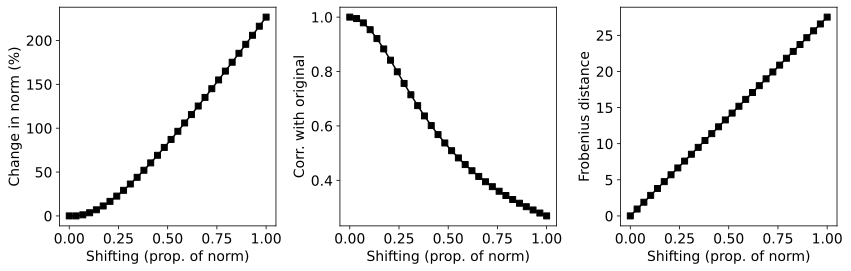

In [29]:
# size of the matrix
N = 10

shifting = np.linspace(0,1,30)

# original matrix
A = np.random.randn(N,N)
normA = np.linalg.norm(A,'fro')

# initialize results matrices
shiftingResults = np.zeros( (len(shifting),3) )
resultsNames = [ 'Change in norm (%)','Corr. with original','Frobenius distance' ]



for si in range(len(shifting)):
    # shift the matrix
    As = A + shifting[si]*normA*np.eye(N)

    # get the new norm and transform to %-change
    normShift = np.linalg.norm(As,'fro')
    shiftingResults[si,0] = 100 * (normShift-normA)/normA

    # compute correlation
    shiftingResults[si,1] = np.corrcoef(A.flatten(),As.flatten())[0,1]

    # Frobenius distance
    shiftingResults[si,2] = EuclideanDistance(A,As)




## plotting!
_,axs = plt.subplots(1,3,figsize=(12,4))

for i in range(3):

    # plot the results
    axs[i].plot(shifting,shiftingResults[:,i],'ks-')
    axs[i].set_xlabel('Shifting (prop. of norm)')
    axs[i].set_ylabel(resultsNames[i])

plt.tight_layout()
plt.savefig('Figure_06_06.png',dpi=300)
plt.show()

## Exercise 6-5

I will now show you how to create random matrices with arbitrary rank (subject
to the constraints about matrix sizes, etc.). To create an M × N matrix with rank r,
multiply a random M × r matrix with an r × N matrix. Implement this in Python and
confirm that the rank is indeed r. What happens if you set r > min{M,N}, and why
does that happen?

In [30]:
# Make a matrix with specified size and rank

M = 5
N = 8
r = 3

A = np.random.randn(M,r) @ np.random.randn(r,N)

print(A.shape)
print(np.linalg.matrix_rank(A))

(5, 8)
3


## Exercise 6-5

Demonstrate the addition rule of matrix rank (r(A + B) ≤ r(A) + r(B)) by creating
three pairs of rank-1 matrices that have a sum with (1) rank-0, (2) rank-1, and (3)
rank-2. Then repeat this exercise using matrix multiplication instead of addition.

In [31]:
# summed matrix has rank-0

A = np.diag([ 1,0,0,0,0])
B = np.diag([-1,0,0,0,0])
C = A+B

# print out their ranks
np.linalg.matrix_rank(A),np.linalg.matrix_rank(B),np.linalg.matrix_rank(C)

(1, 1, 0)

In [32]:
# summed matrix has rank-1

A = np.diag([1,0,0,0,0])
B = np.zeros(A.shape)
B[0,1] = 10
C = A+B

# print out their ranks
np.linalg.matrix_rank(A),np.linalg.matrix_rank(B),np.linalg.matrix_rank(C)

(1, 1, 1)

In [33]:
# summed matrix has rank-2

A = np.diag([1,0,0,0,0])
B = np.diag([0,1,0,0,0])
C = A+B

# print out their ranks
np.linalg.matrix_rank(A),np.linalg.matrix_rank(B),np.linalg.matrix_rank(C)

(1, 1, 2)

In [34]:
# random matrices have maximum possible rank!
A = np.random.randn(5,1) @ np.random.randn(1,5)
B = np.random.randn(5,1) @ np.random.randn(1,5)
C = A+B

# print out their ranks
np.linalg.matrix_rank(A),np.linalg.matrix_rank(B),np.linalg.matrix_rank(C)

(1, 1, 2)

## Exercise 6-7

Put the code from Exercise 6-5 into a Python function that takes parameters M and
r as input and provides a random M × M rank-r matrix as output. In a double for
loop, create pairs of 20 × 20 matrices with individual ranks varying from 2 to 15. Add
and multiply those matrices, and store the ranks of those resulting matrices. Those
ranks can be organized into a matrix and visualized as a function of the ranks of the
individual matrices (Figure 6-9).

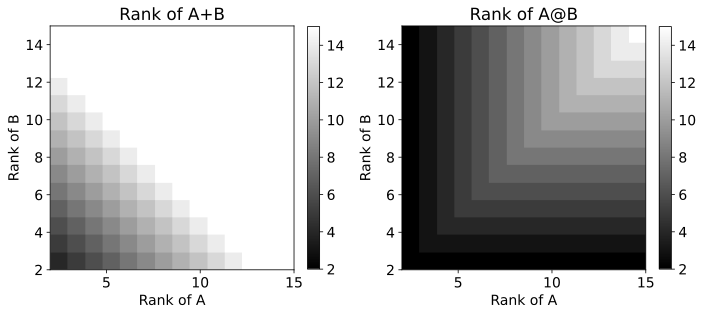

In [35]:

def makeAmatrix(M,r):
    return np.random.randn(M,r) @ np.random.randn(r,M)


# parameters
matSize = 20 # matrix size (square)
rs = range(2,16) # range of ranks

# initialize results matrix
Ranks = np.zeros((len(rs),len(rs),2))

# run the simulation
for i in range(len(rs)):
    for j in range(len(rs)):
        # create the matrices
        S = makeAmatrix(matSize,rs[i]) + makeAmatrix(matSize,rs[j])
        M = makeAmatrix(matSize,rs[i]) @ makeAmatrix(matSize,rs[j])

        # compute their ranks
        Ranks[i,j,0] = np.linalg.matrix_rank(S)
        Ranks[i,j,1] = np.linalg.matrix_rank(M)



## visualization
fig,axs = plt.subplots(1,2,figsize=(10,6))
s = '+@' # symbols for title

for i in range(2):
    # draw heatmat
    h = axs[i].imshow(Ranks[:,:,i],vmin=np.min(rs),vmax=np.max(rs),origin='lower',
                    extent=(rs[0],rs[-1],rs[0],rs[-1]),cmap='gray')
  
    # add colorbar and other niceties
    fig.colorbar(h,ax=axs[i],fraction=.045)
    axs[i].set_xlabel('Rank of A')
    axs[i].set_ylabel('Rank of B')
    axs[i].set_title(f'Rank of A{s[i]}B')


plt.savefig('Figure_06_09.png',dpi=300)
plt.tight_layout()
plt.show()

## Exercise 6-8

Interestingly, the matrices A, AT, ATA, and AAT all have the same rank. Write code
to demonstrate this, using random matrices of various sizes, shapes (square, tall,
wide), and ranks.

In [36]:
# matrix sizes and rank
M = 15
N = 8
r = 4

# compute the four matrices
A   = np.random.randn(M,r) @ np.random.randn(r,N)
At  = A.T
AtA = A.T@A
AAt = A@A.T

# print their ranks
print(
    np.linalg.matrix_rank(A),
    np.linalg.matrix_rank(At),
    np.linalg.matrix_rank(AtA),
    np.linalg.matrix_rank(AAt)
)

4 4 4 4


## Exercise 6-9

The goal of this exercise is to answer the question v ∈ C A ? Create a rank-3 matrix
A ∈ ℝ4 × 3 and vector v ∈ ℝ4 using numbers randomly drawn from a normal distri‐
bution. Follow the algorithm described earlier to determine whether the vector is in
the column space of the matrix. Rerun the code multiple times to see whether you
find a consistent pattern. Next, use a A ∈ ℝ4 × 4 rank-4 matrix. I’m willing to bet one million bitcoins8 that you always find that v ∈ C A when A is a 4 × 4 random matrix
(assuming no coding mistakes). What makes me confident about your answer?9

For an extra challenge, put this code into a function that returns True or False
depending on the outcome of the test, and that raises an exception (that is, a useful
error message) if the size of the vector does not match for matrix augmentation.

In [38]:
# function to run algorithm
def is_V_inColA(A,v):
    # check sizes
    if A.shape[0]!=v.shape[0]:
        raise Exception('Size mismatch! A and v must have the same column dimensionality!.')

    # compute ranks
    rankA  = np.linalg.matrix_rank(A)
    rankAv = np.linalg.matrix_rank( np.hstack((A,v)) )

    # function outputs TRUE if v \in C(A)
    return rankA==rankAv


# create matrix and vector
A = np.random.randn(4,3)
v = np.random.randn(4,1)

# test!
is_V_inColA(A,v)

False

## Exercise 6-10

In [39]:
# function to run algorithm
def is_V_inColA(A,v):

  # check sizes
  if A.shape[0]!=v.shape[0]:
    raise Exception('Size mismatch! A and v must have the same column dimensionality!.')

    # compute ranks
    rankA  = np.linalg.matrix_rank(A)
    rankAv = np.linalg.matrix_rank( np.hstack((A,v)) )

    # function outputs TRUE if v \in C(A)
    return rankA==rankAv


# create matrix and vector
A = np.random.randn(4,3)
v = np.random.randn(4,1)

# test!
is_V_inColA(A,v)

## Exercise 6-6